<a href="https://colab.research.google.com/github/YuejiaoHuang/exercises/blob/master/MIA_Handin1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminaries

## Mount Google drive

In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# change to relevant directory
root_path = 'gdrive/My Drive/MIA'  
os.chdir(root_path)
os.getcwd()

'/content/gdrive/My Drive/MIA'

## load all the necessary packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import radon, rescale, iradon
from skimage.draw import ellipse,circle

## Installing missing packages if necessary

Check if the package scikit-image is available to you; figure out how you do this and if you cna install it if it's not available to you.

Note: Currently, software installations within Google Colaboratory are not persistent, in that you must reinstall libraries every time you (re-)connect to an instance. Since Colab has numerous useful common libraries installed by default, this is less of an issue than it may seem, and installing those libraries which are not pre-installed are easily added in one of a few different ways.

You will want to be aware, however, that installing any software which needs to be built from source may take longer than is feasible when connecting/reconnecting to your instance.

Colab supports both the pip and apt package managers. Regardless of which you are using, remember to prepend any bash commands with a !.

In [4]:
try:
    import skimage
    print("scikit-image' is installed")
except ModuleNotFoundError:
    print("scikit-image' is not installed")


scikit-image' is installed


# Exercise 1
# The Radon transform


In computed tomography, the tomography reconstruction problem is to obtain
a tomographic slice image from a set of projections [1]. A projection is
formed by drawing a set of parallel rays through the 2D object of interest,
assigning the integral of the object's contrast along each ray to a single
pixel in the projection. A single projection of a 2D object is one dimensional.
To enable computed tomography reconstruction of the object, several projections
must be acquired, each of them corresponding to a different angle between the
rays with respect to the object. A collection of projections at several angles
is called a sinogram, which is a linear transform of the original image.

The inverse Radon transform is used in computed tomography to reconstruct
a 2D image from the measured projections (the sinogram). A practical, exact
implementation of the inverse Radon transform does not exist, but there are
several good approximate algorithms available.

As the inverse Radon transform reconstructs the object from a set of
projections, the (forward) Radon transform can be used to simulate a
tomography experiment.

In this hand-in you will perform the Radon transform to simulate a tomography experiment
and reconstruct the input image based on the resulting sinogram formed by
the simulation. 



## Starting your hand-in

1.0 Basics

Your first task is to introduce the Radon transform and write down its mathematical formula. Then you are going to play with implementations of it below. 

## Simple things first...

1.1 Phantoms and Sinograms

1. The sinogram is called so because the Radon transform of a single white pixel on a black
background is a sinusoid curve in the sinogram. Generate such phantoms and inspect the
corresponding sinograms. 
Example: 



In [ ]:
s = (128,128)
X = np.zeros(s); 
X[10,10] = 1; 

# Draw the image
plt.imshow(X)
plt.axis("off")
plt.show()

In [ ]:
S = radon(X, circle=False)

# Plot the original grayscale image as well as the sinogram of the image

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(X, cmap=plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(S, cmap=plt.cm.Greys_r,extent=(0, 180, 0, S.shape[0]), aspect='auto')

ax1.axis('off')

fig.tight_layout()
plt.show()

2. A popular test image in CT is the Shepp-Logan phantom (for more information, see L. A. Shepp and B. F. Logan, “The Fourier reconstruction of a head section,” in IEEE Transactions on Nuclear Science, vol. 21, no. 3, pp. 21-43, June 1974. DOI:10.1109/TNS.1974.6499235 or 
http://en.wikipedia.org/wiki/Shepp%E2%80%93Logan_phantom). 
It is available for download in your data folder and is taken from the Wikipedia article (It was drawn by Larry Shepp and Benjamin F. Logan, Uploaded by Bitic - Shapes drawn with TikZ using original definition by Shepp and Logan and colored using Adobe Illustrator by Bitic, 2015-11-25). Load and display the default Shepp-Logan phantom.




In [ ]:
# Load the image
im = imread('./Data/shepp_logan_phantom.png')
# Draw the image
plt.imshow(im,cmap='gray')

In [ ]:
help(imread)

Since this is 3 dimensional we slice it to be only two-dimensional.

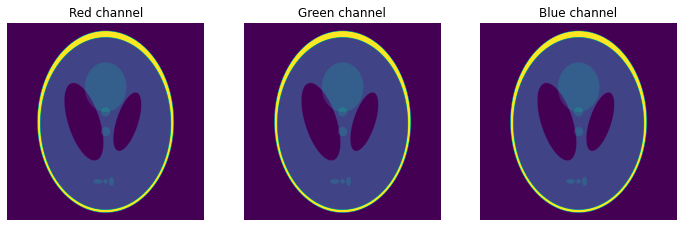

In [7]:
# Slice image
fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (12,4.5))

# Draw an image on each subplot
channels = ['Red channel','Green channel','Blue channel']
for i in range(3):
  axes[i].set_title(channels[i])
  axes[i].imshow(im[:,:,i])
  axes[i].axis('off')
plt.savefig('RGBimages.png')
plt.show()

In [8]:
# Explicitly examine shape
print((im[:,:,0] == im[:,:,2]).all())
print(im.shape)

True
(1024, 1024, 3)


3. The Radon transform of an image can be computed using radon. Pick a range of angles
such as = 0:179 and generate and display the Radon transform (the sinogram) of the
Shepp-Logan phantom. Each column of the sinogram corresponds to a 1D projection
at a particular angle (try plotting individual columns to better see how intensity values
varies as function of position). Try also using more angles (smaller angular increment).
Try to match up features in the sinogram with features of the Shepp-Logan phantom.



In [5]:
# Perform the radon transform on this image for a range of angels theta between 0 and 180 degrees
theta = np.linspace(0., 180., max(im.shape), endpoint=False)

sinogram = radon(im[:,:,0],theta = theta,circle=True)
sin = radon(im[:,:,0], theta= [0,45,90])

theta_1 = np.linspace(0., 360., max(im.shape), endpoint=False)
sinogram_1 = radon(im[:,:,0],theta = theta_1,circle=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Image dtype is not float. By default radon will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.18 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Image dtype is not float. By default radon will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.18 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Image dtype is not float. By default radon will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.18 this behavior will change to preserve_range=F

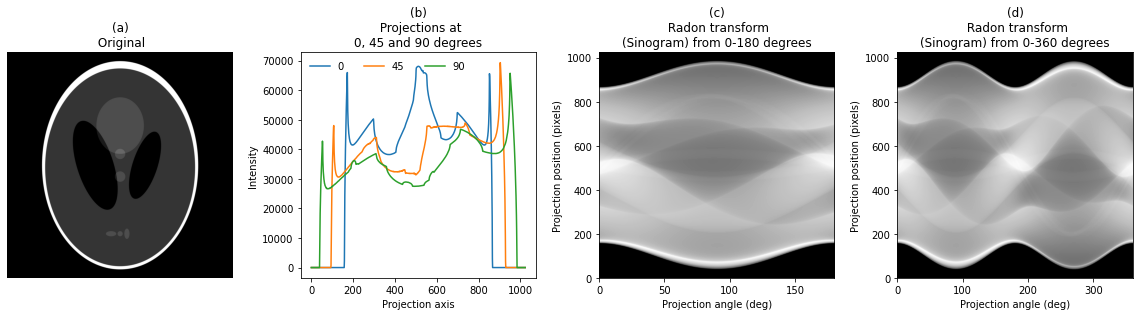

In [6]:
# Plot the original grayscale image as well as the sinogram of the image
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4.5))
ax1.set_title("(a)\n Original")
ax1.imshow(im, cmap=plt.cm.Greys_r)
ax3.set_title("(c)\n Radon transform\n(Sinogram) from 0-180 degrees")
ax3.set_xlabel("Projection angle (deg)")
ax3.set_ylabel("Projection position (pixels)")
ax3.imshow(sinogram, cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')
ax1.axis('off')
ax2.set_title("(b)\n Projections at\n0, 45 and 90 degrees")
ax2.set_xlabel("Projection axis")
ax2.set_ylabel("Intensity")
ax2.plot(sin[:,0],label = '0')
ax2.plot(sin[:,1],label = '45')
ax2.plot(sin[:,2],label = '90')
ax2.legend(loc = 'upper left',ncol = 3,frameon=False)
ax4.set_title("(d)\n Radon transform\n(Sinogram) from 0-360 degrees")
ax4.set_xlabel("Projection angle (deg)")
ax4.set_ylabel("Projection position (pixels)")
ax4.imshow(sinogram_1, cmap=plt.cm.Greys_r,extent=(0, 360, 0, sinogram_1.shape[0]), aspect='auto')
fig.tight_layout()
plt.savefig('radon.png')
plt.show()


4. Try extending the angular range up to 360 degrees. Can you see any symmetries in the sinogram?
Do we need 360 degrees data?



In [ ]:
# Perform the radon transform on this image for a range of angels theta between 0 and 360 degrees


In [ ]:
# Plot the original grayscale image as well as the sinogram of the image



5. Due to the many ellipses present in the Shepp-Logan phantom it can be difficult to
fully understand the sinogram. A user-defined phantom consisting of a superposition of
ellipses can be created. For example a single centered disk in a 501-by-
501 image would be a good example. Create this phantom and try to predict what its sinogram will look like. Verify using radon.


In [29]:
# Make phantom
# disk
d0 = np.zeros((501, 501))
rr00, cc00 = circle(251, 251, 100)
d0[rr00, cc00] = 1
#plt.imshow(d0)
# Draw phantom

In [30]:
# larger disk
d1 = np.zeros((501, 501))
rr01, cc01 = circle(251, 251, 150)
d1[rr01, cc01] = 1
#plt.imshow(d1)

In [31]:
# change intensity
d2 = np.zeros((501, 501))
rr02, cc02 = circle(251, 251, 100)
d2[rr02, cc02] = 255
#plt.imshow(d2)

In [32]:
# ellipse
e0 = np.zeros((501,501))
rr0,cc0 = ellipse(251,251,50,100)
e0[rr0,cc0] = 1
#plt.imshow(e0)

In [33]:
# rotated 
e1 = np.zeros((501,501))
rr1,cc1 = ellipse(251,251,50,100,rotation=np.deg2rad(30))
e1[rr1,cc1] = 1
#plt.imshow(e1)

In [34]:
# translated
e2 = np.zeros((501,501))
rr2,cc2 = ellipse(251,151,50,100)
e2[rr2,cc2] = 1
#plt.imshow(e2)

In [35]:
# Calculate the radon transform

imgs = [d0,d1,d2,e0,e1,e2]

sinograms = []
for i in range(len(imgs)):
  sinograms.append(radon(imgs[i],theta = np.linspace(0., 180., max(imgs[i].shape), endpoint=False) ,circle=True))

In [36]:
print((sinograms[0] == sinograms[1]).all())

False


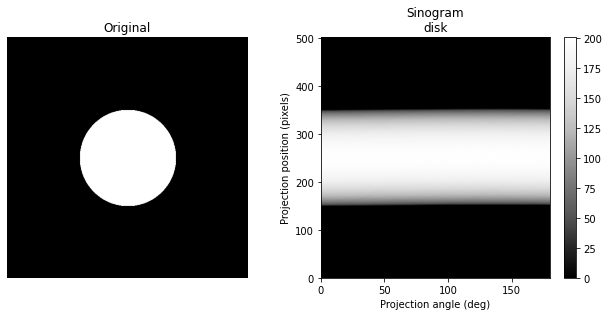

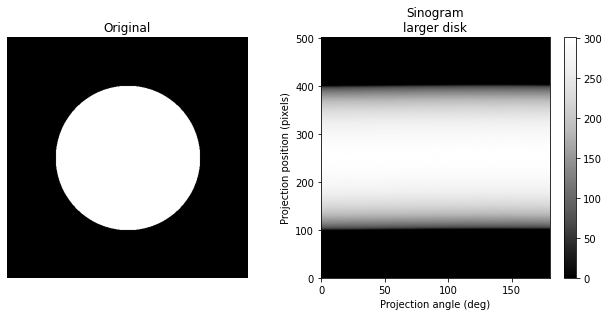

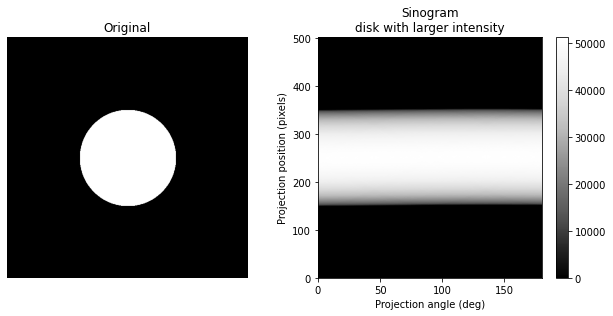

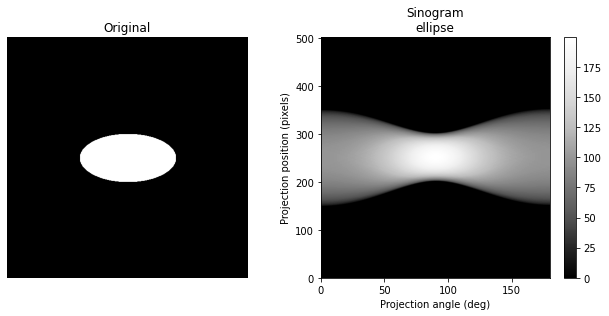

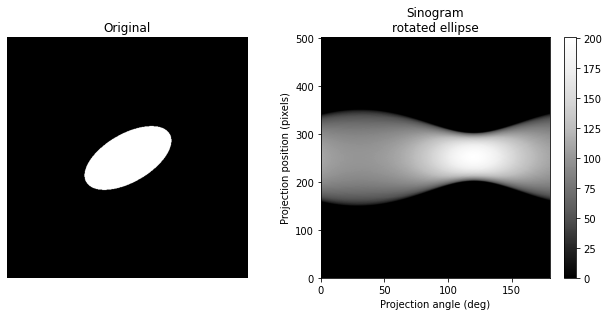

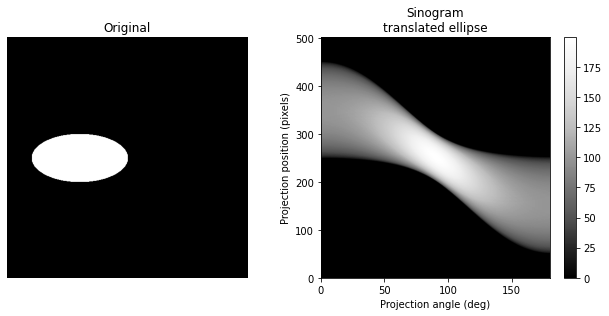

In [39]:
# Plot the original grayscale image as well as the sinogram of the image
imn = ['disk','larger disk','disk with larger intensity','ellipse','rotated ellipse','translated ellipse']
names = ['disk.png','larger disk.png','disk with larger intensity.png','ellipse.png','rotated ellipse.png','translated ellipse.png']
for i in range(6):

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5))
  ax1.set_title("Original")
  ax1.imshow(imgs[i], cmap=plt.cm.Greys_r)
  ax2.set_title("Sinogram\n"+imn[i])
  ax2.set_xlabel("Projection angle (deg)")
  ax2.set_ylabel("Projection position (pixels)")
  ax2.imshow(sinograms[i], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinograms[i].shape[0]), aspect='auto')
  fig.colorbar(ax2.imshow(sinograms[i], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinograms[i].shape[0]), aspect='auto'),ax=ax2)
  ax1.axis('off')
  fig.tight_layout()
  plt.savefig(names[i])
  plt.show()



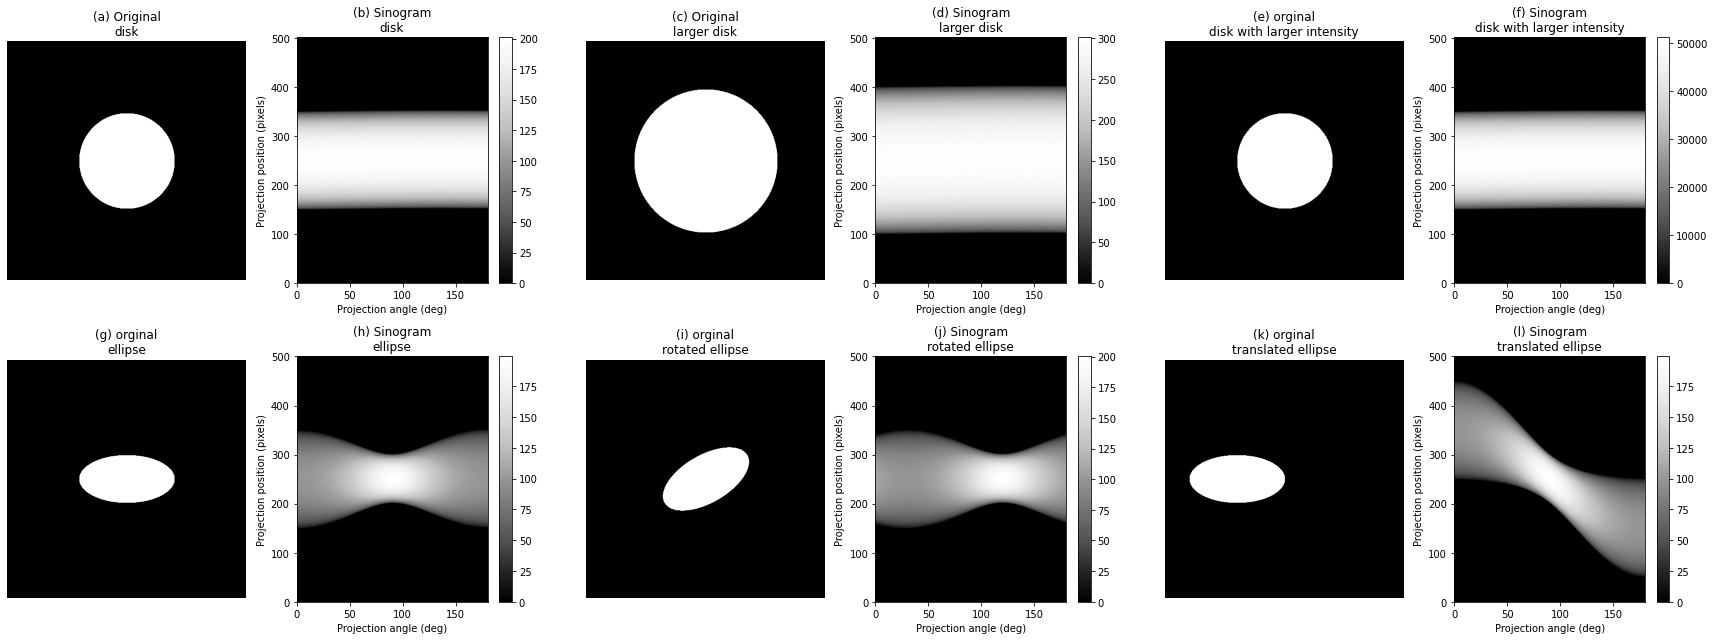

In [55]:
imn = ['disk','larger disk','disk with larger intensity','ellipse','rotated ellipse','translated ellipse']
names = ['disk.png','larger disk.png','disk with larger intensity.png','ellipse.png','rotated ellipse.png','translated ellipse.png']

fig, axes = plt.subplots(2, 6, figsize=(24, 9))
axes[0,0].set_title("(a) Original\n" + imn[0])
axes[0,0].imshow(imgs[0], cmap=plt.cm.Greys_r)
axes[0,1].set_title("(b) Sinogram\n"+imn[0])
axes[0,1].set_xlabel("Projection angle (deg)")
axes[0,1].set_ylabel("Projection position (pixels)")
axes[0,1].imshow(sinograms[0], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinograms[0].shape[0]), aspect='auto')
fig.colorbar(axes[0,1].imshow(sinograms[0], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinograms[0].shape[0]), aspect='auto'),ax=axes[0,1])
axes[0,0].axis('off')
axes[0,2].set_title("(c) Original\n"+imn[1])
axes[0,2].imshow(imgs[1], cmap=plt.cm.Greys_r)
axes[0,3].set_title("(d) Sinogram\n"+imn[1])
axes[0,3].set_xlabel("Projection angle (deg)")
axes[0,3].set_ylabel("Projection position (pixels)")
axes[0,3].imshow(sinograms[1], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinograms[1].shape[0]), aspect='auto')
fig.colorbar(axes[0,3].imshow(sinograms[1], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinograms[1].shape[0]), aspect='auto'),ax=axes[0,3])
axes[0,2].axis('off')
  
axes[0,4].set_title("(e) orginal\n"+imn[2])
axes[0,4].imshow(imgs[2], cmap=plt.cm.Greys_r)
axes[0,5].set_title("(f) Sinogram\n"+imn[2])
axes[0,5].set_xlabel("Projection angle (deg)")
axes[0,5].set_ylabel("Projection position (pixels)")
axes[0,5].imshow(sinograms[2], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinograms[2].shape[0]), aspect='auto')
fig.colorbar(axes[0,5].imshow(sinograms[2], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinograms[2].shape[0]), aspect='auto'),ax=axes[0,5])
axes[0,4].axis('off')
axes[1,0].set_title("(g) orginal\n"+imn[3])
axes[1,0].imshow(imgs[3], cmap=plt.cm.Greys_r)
axes[1,1].set_title("(h) Sinogram\n"+imn[3])
axes[1,1].set_xlabel("Projection angle (deg)")
axes[1,1].set_ylabel("Projection position (pixels)")
axes[1,1].imshow(sinograms[3], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinograms[3].shape[0]), aspect='auto')
fig.colorbar(axes[1,5].imshow(sinograms[3], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinograms[3].shape[0]), aspect='auto'),ax=axes[1,1])
axes[1,0].axis('off')
axes[1,2].set_title("(i) orginal\n"+imn[4])
axes[1,2].imshow(imgs[4], cmap=plt.cm.Greys_r)
axes[1,3].set_title("(j) Sinogram\n"+imn[4])
axes[1,3].set_xlabel("Projection angle (deg)")
axes[1,3].set_ylabel("Projection position (pixels)")
axes[1,3].imshow(sinograms[4], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinograms[4].shape[0]), aspect='auto')
fig.colorbar(axes[1,3].imshow(sinograms[4], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinograms[4].shape[0]), aspect='auto'),ax=axes[1,3])
axes[1,2].axis('off')
axes[1,4].set_title("(k) orginal\n"+imn[5])
axes[1,4].imshow(imgs[5], cmap=plt.cm.Greys_r)
axes[1,5].set_title("(l) Sinogram\n"+imn[5])
axes[1,5].set_xlabel("Projection angle (deg)")
axes[1,5].set_ylabel("Projection position (pixels)")
axes[1,5].imshow(sinograms[5], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinograms[5].shape[0]), aspect='auto')
fig.colorbar(axes[1,5].imshow(sinograms[5], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinograms[5].shape[0]), aspect='auto'),ax=axes[1,5])
axes[1,4].axis('off')
fig.tight_layout()
plt.savefig('circle.png')
plt.show()

6. Repeat the experiment with a single disk while changing its parameters to get a larger disk, a disk with changed intensity, an ellipse, a rotated ellipse, and a translated ellipse.



In [ ]:
# Make another phantom and display it



In [ ]:
# Calculate the radon transform


In [ ]:
# Plot the original grayscale image as well as the sinogram of the image



7. Describe how the sinogram changes (for example in terms of amplitude, phase, thickness,
intensity) as function of the ellipse position, size and orientation.

## Now on to a bit of mathematics 

1.2 Linearity of the Radon transform

The Radon transform is a linear transform. This means that a sinogram of an image can be
decomposed into a sum of sinograms of the various objects in the image.

1. Verify analytically that the Radon transform is linear, i.e., that R(ax + by) = aR(x) +
bR(y) for two images x and y and constants a and b.

2. Verify linearity numerically: Generate two different test images X and Y with a single
ellipse in each. Generate and display the sinogram of each. Generate also the sinogram
of a linear combination of X and Y, for example, Z = 3*X + 2*Y. Demonstrate that the
sinogram of Z equals the same linear combination of the sinograms of X and Y.

In [44]:
# Re-use or peform two transforms
e3 = np.zeros((501,501))
rr,cc = ellipse(251,251,100,150)
e3[rr,cc]= 1

e4 = 3*e0+2*e3


In [45]:
# Draw the difference image


Imgs = [e0,e3,e4]
sinogram_s = []
for i in range(len(Imgs)):
  sinogram_s.append(radon(Imgs[i],theta = np.linspace(0., 180., max(Imgs[i].shape), endpoint=False) ,circle=True))

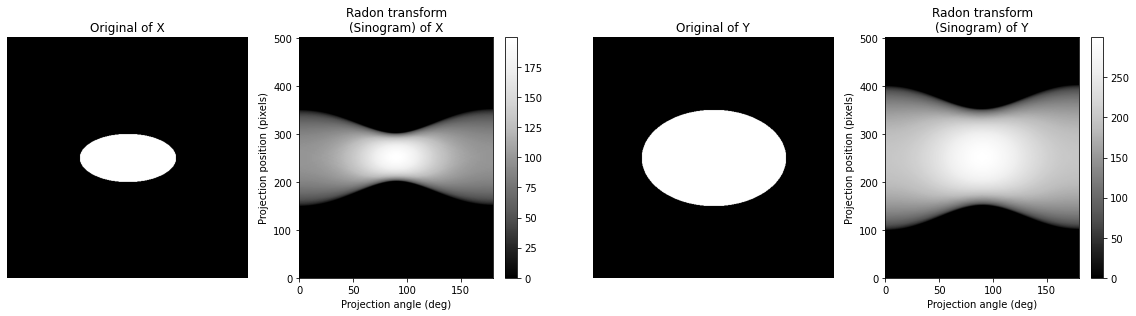

In [46]:
# Plot the original grayscale image as well as the sinogram of the image
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(16, 4.5))

ax1.set_title("Original of X")
ax1.imshow(Imgs[0], cmap=plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram) of X")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
a= ax2.imshow(sinogram_s[0], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinogram_s[0].shape[0]), aspect='auto')
fig.colorbar(a,ax=ax2)
ax1.axis('off')
#axes[6].imshow(3*sinogram_s[0]+2*sinogram_s[1],cmap=plt.cm.Greys_r,extent=(0, 180, 0, (3*sinogram_s[0]+2*sinogram_s[1]).shape[0]), aspect='auto')

ax3.set_title("Original of Y")
ax3.imshow(Imgs[1], cmap=plt.cm.Greys_r)

ax4.set_title("Radon transform\n(Sinogram) of Y")
ax4.set_xlabel("Projection angle (deg)")
ax4.set_ylabel("Projection position (pixels)")
b = ax4.imshow(sinogram_s[1], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinogram_s[1].shape[0]), aspect='auto')
fig.colorbar(b,ax=ax4)
ax3.axis('off')

fig.tight_layout()
fig.savefig('linear_1.png')
plt.show()

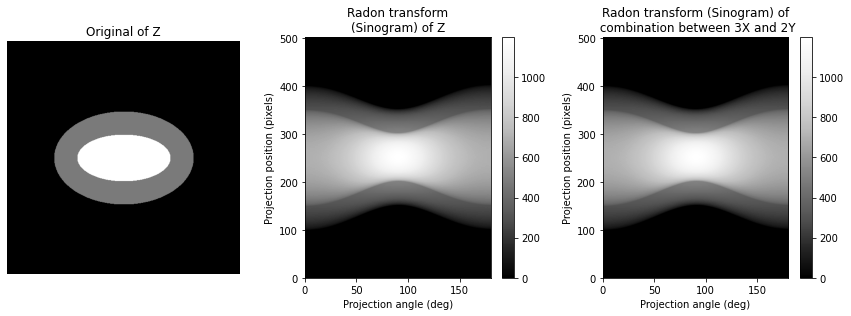

In [47]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (12,4.5))
ax1.set_title("Original of Z")
ax1.imshow(Imgs[2], cmap=plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram) of Z")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
b=ax2.imshow(sinogram_s[2], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinogram_s[2].shape[0]), aspect='auto')
ax1.axis('off')
fig.colorbar(b,ax=ax2)

ax3.set_title("Radon transform (Sinogram) of\n combination between 3X and 2Y")
ax3.set_xlabel("Projection angle (deg)")
ax3.set_ylabel("Projection position (pixels)")
a = ax3.imshow((3*sinogram_s[0]+2*sinogram_s[1]), cmap=plt.cm.Greys_r,extent=(0, 180, 0, (3*sinogram_s[0]+2*sinogram_s[1]).shape[0]), aspect='auto')
fig.colorbar(a,ax=ax3)
fig.tight_layout()
fig.savefig('linear_2.png')
plt.show()

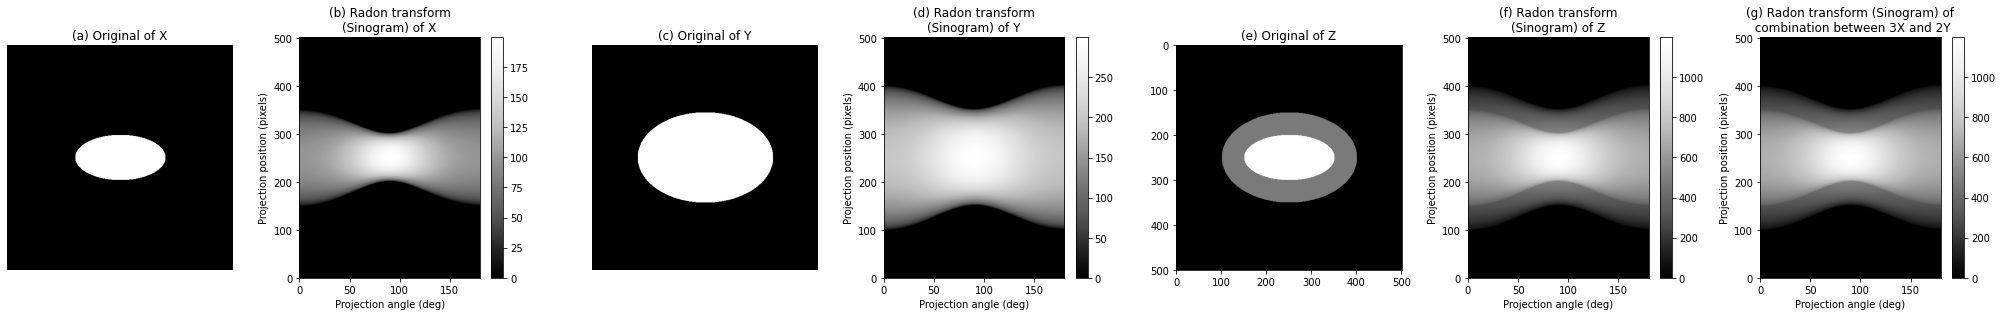

In [57]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7, figsize=(28, 4.5))

ax1.set_title("(a) Original of X")
ax1.imshow(Imgs[0], cmap=plt.cm.Greys_r)

ax2.set_title("(b) Radon transform\n(Sinogram) of X")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
a= ax2.imshow(sinogram_s[0], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinogram_s[0].shape[0]), aspect='auto')
fig.colorbar(a,ax=ax2)
ax1.axis('off')
#axes[6].imshow(3*sinogram_s[0]+2*sinogram_s[1],cmap=plt.cm.Greys_r,extent=(0, 180, 0, (3*sinogram_s[0]+2*sinogram_s[1]).shape[0]), aspect='auto')

ax3.set_title("(c) Original of Y")
ax3.imshow(Imgs[1], cmap=plt.cm.Greys_r)

ax4.set_title("(d) Radon transform\n(Sinogram) of Y")
ax4.set_xlabel("Projection angle (deg)")
ax4.set_ylabel("Projection position (pixels)")
b = ax4.imshow(sinogram_s[1], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinogram_s[1].shape[0]), aspect='auto')
fig.colorbar(b,ax=ax4)
ax3.axis('off')
ax5.set_title("(e) Original of Z")
ax5.imshow(Imgs[2], cmap=plt.cm.Greys_r)

ax6.set_title("(f) Radon transform\n(Sinogram) of Z")
ax6.set_xlabel("Projection angle (deg)")
ax6.set_ylabel("Projection position (pixels)")
c=ax6.imshow(sinogram_s[2], cmap=plt.cm.Greys_r,extent=(0, 180, 0, sinogram_s[2].shape[0]), aspect='auto')
ax1.axis('off')
fig.colorbar(c,ax=ax6)

ax7.set_title("(g) Radon transform (Sinogram) of\n combination between 3X and 2Y")
ax7.set_xlabel("Projection angle (deg)")
ax7.set_ylabel("Projection position (pixels)")
d = ax7.imshow((3*sinogram_s[0]+2*sinogram_s[1]), cmap=plt.cm.Greys_r,extent=(0, 180, 0, (3*sinogram_s[0]+2*sinogram_s[1]).shape[0]), aspect='auto')
fig.colorbar(d,ax=ax7)
fig.tight_layout()
fig.savefig('linear.png')
plt.show()

In [92]:
c = 3*sinogram_s[0]+2*sinogram_s[1]
print((sinogram_s[2]==c).all())
print(np.min(sinogram_s[2]- c))
print(np.max(sinogram_s[2]- c))


False
-4.547473508864641e-13
6.821210263296962e-13


What happened here? Explain!

# Exercise 2
# The Filtered Back-Projection

The mathematical foundation of the filtered back projection is the Fourier
slice theorem [2]. It uses Fourier transform of the projection and
interpolation in Fourier space to obtain the 2D Fourier transform of the
image, which is then inverted to form the reconstructed image. The filtered
back projection is among the fastest methods of performing the inverse
Radon transform. 


2.0 Explain the theory behing filtered back-projection as it was introduced in the lecture.


2.1 Reconstruction

1. Generate clean and noisy projection data. You can do this in several ways. You can subsample the problem, so sample with less degrees. You can also try to simulate noise in the sinogram space, which can be done by applying Poisson noise to
the clean transmission sinogram.




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Image dtype is not float. By default radon will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.18 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
  This is separate from the ipykernel package so we can avoid doing imports until


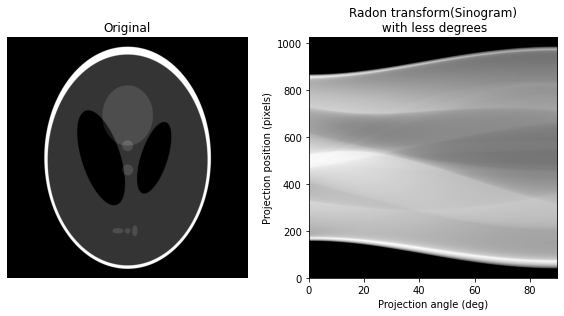

In [20]:
# Subsampling the problem
theta_sub = np.linspace(0.,90.,max(im.shape),endpoint= False)
sinogram_sub = radon(im[:,:,0],theta= theta_sub)
# plot the orginal and sinogram plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))
ax1.set_title("Original")
ax1.imshow(im, cmap=plt.cm.Greys_r)
ax2.set_title("Radon transform(Sinogram)\n with less degrees")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram_sub, cmap=plt.cm.Greys_r,extent=(0, 90, 0, sinogram_sub.shape[0]), aspect='auto')
ax1.axis('off')
fig.tight_layout()
plt.show()

OR

In [48]:
# Adding Poisson noise to the sinogram
print(np.max(sinogram))
sin_noise = sinogram + np.random.poisson(sinogram,size = None)
print(np.max(sin_noise))

71077.09041357569
142400.62947029472


2. Compute an FBP reconstruction from the clean and noisy projection data using iradon.
Check the help of iradon to specify inputs. Other inputs can be set to their defaults.



In [49]:
from skimage.transform import iradon

# Do the FBP reconstcutions of the clean and noisy data; calculate a measure of error for the different reconstructions
recon_c = iradon(sinogram, theta = theta, circle = True)
error_c = recon_c - im[:,:,0]
print(f"FBP rms reconstruction error from the clean data: {np.sqrt(np.mean(error_c**2)):.3g}")
recon_n = iradon(sin_noise, theta = theta, circle = True)
error_n = recon_n - im[:,:,0]
print(f"FBP rms reconstruction error from the noisy data: {np.sqrt(np.mean(error_n**2)):.3g}")


FBP rms reconstruction error from the clean data: 2.99
FBP rms reconstruction error from the noisy data: 62.6


In [28]:
delta = recon_n - recon_c
print(f"FBP rms reconstruction error between the different reconstructions: {np.sqrt(np.mean(delta**2)):.3g}")

FBP rms reconstruction error between the different reconstructions: 62.9


3. Display the reconstructions and compare with the original Shepp-Logan image. Small
differences can sometimes be seen clearer by displaying the difference images and/or by
displaying only subregions of the full image.

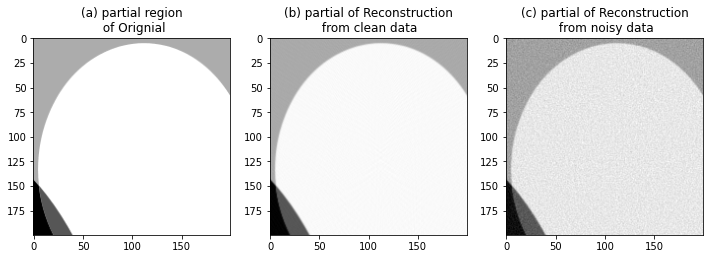

In [50]:
# Display reconstructions
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (12,5))
ax1.set_title('(a) partial region\n of Orignial')
ax1.imshow(im[200:400,400:600,0],cmap = 'gray')
#ax1.axis('off')
ax2.set_title('(b) partial of Reconstruction\n from clean data')
a = ax2.imshow(recon_c[200:400,400:600], cmap = 'gray')
#fig.colorbar(a,ax = ax2)
ax3.set_title('(c) partial of Reconstruction\n from noisy data')
b = ax3.imshow(recon_n[200:400,400:600], cmap = 'gray')
#fig.colorbar(b,ax = ax3)
plt.savefig('partial recon.png')
plt.show()

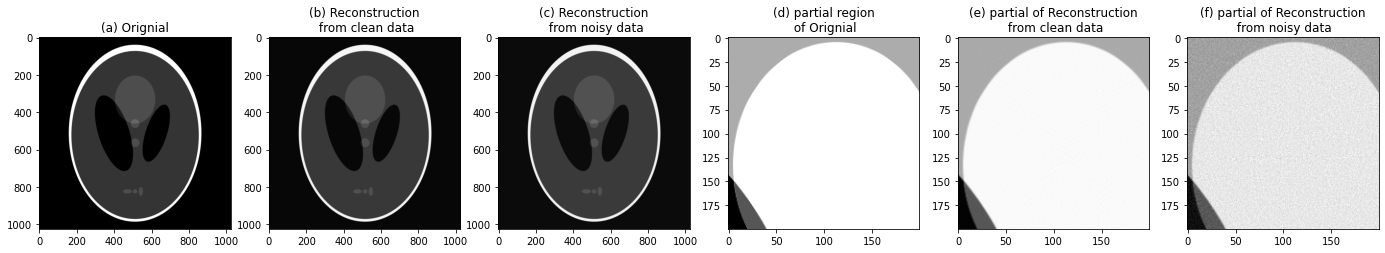

In [58]:

fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6,figsize = (24,4.5))
ax1.set_title('(a) Orignial')
ax1.imshow(im[:,:,0],cmap = 'gray')
#ax1.axis('off')
ax2.set_title('(b) Reconstruction\n from clean data')
a = ax2.imshow(recon_c, cmap = 'gray')
#fig.colorbar(a,ax = ax2)
ax3.set_title('(c) Reconstruction\n from noisy data')
b = ax3.imshow(recon_n, cmap = 'gray')
#fig.colorbar(b,ax = ax3)
ax4.set_title('(d) partial region\n of Orignial')
ax4.imshow(im[200:400,400:600,0],cmap = 'gray')
#ax1.axis('off')
ax5.set_title('(e) partial of Reconstruction\n from clean data')
ax5.imshow(recon_c[200:400,400:600], cmap = 'gray')
#fig.colorbar(a,ax = ax2)
ax6.set_title('(f) partial of Reconstruction\n from noisy data')
ax6.imshow(recon_n[200:400,400:600], cmap = 'gray')
#fig.colorbar(b,ax = ax3)
plt.savefig('recon.png')
plt.show()

2.2 Changing the Filter

1. By default iradon uses the Ram-Lak filter. Experiment with the effects on the reconstruction of using other filters, including the filter 'none', which corresponds to an unfiltered backprojection.



In [51]:
# Use different filters in your reconstructions
filters = [None,'ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']
reconstructions = []
errors = []
for i in range(len(filters)):
  reconstructions.append(iradon(sinogram, theta= theta, filter= filters[i]))
  errors.append(iradon(sinogram, theta= theta, filter= filters[i])- im[:,:,0])



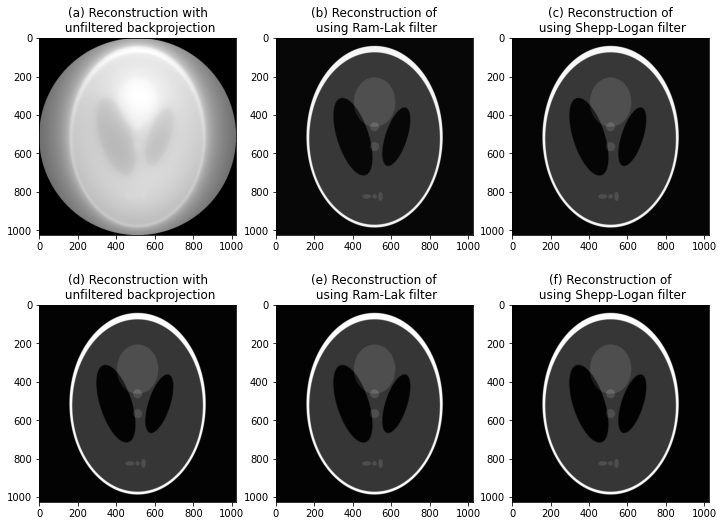

In [53]:
# Display the reconstructions
fig,axes = plt.subplots(2,3,figsize = (12,9))

axes[0,0].set_title('(a) Reconstruction with\n unfiltered backprojection') 
axes[0,0].imshow(reconstructions[0],cmap='gray')
axes[0,1].set_title('(b) Reconstruction of\n using Ram-Lak filter') 
axes[0,1].imshow(reconstructions[1],cmap='gray')

axes[0,2].set_title('(c) Reconstruction of\n using Shepp-Logan filter') 
axes[0,2].imshow(reconstructions[2],cmap='gray')

axes[1,0].set_title('(d) Reconstruction with\n unfiltered backprojection') 
axes[1,0].imshow(reconstructions[3],cmap='gray')
axes[1,1].set_title('(e) Reconstruction of\n using Ram-Lak filter') 
axes[1,1].imshow(reconstructions[4],cmap='gray')
axes[1,2].set_title('(f) Reconstruction of\n using Shepp-Logan filter') 
axes[1,2].imshow(reconstructions[5],cmap='gray')
plt.savefig('filter2-3.png')
plt.show()

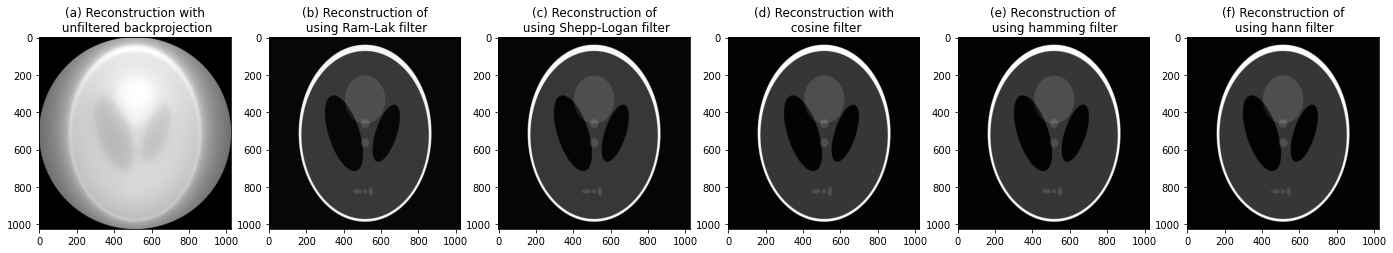

In [59]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6,figsize = (24,4.5))

ax1.set_title('(a) Reconstruction with\n unfiltered backprojection') 
ax1.imshow(reconstructions[0],cmap='gray')
ax2.set_title('(b) Reconstruction of\n using Ram-Lak filter') 
ax2.imshow(reconstructions[1],cmap='gray')

ax3.set_title('(c) Reconstruction of\n using Shepp-Logan filter') 
ax3.imshow(reconstructions[2],cmap='gray')

ax4.set_title('(d) Reconstruction with\n cosine filter') 
ax4.imshow(reconstructions[3],cmap='gray')
ax5.set_title('(e) Reconstruction of\n using hamming filter') 
ax5.imshow(reconstructions[4],cmap='gray')
ax6.set_title('(f) Reconstruction of\n using hann filter') 
ax6.imshow(reconstructions[5],cmap='gray')
plt.savefig('filter1-6.png')
plt.show()

In [92]:
for i in range(len(errors)):
  print(f"FBP rms reconstruction error: {np.sqrt(np.mean(errors[i]**2)):.3g}")

FBP rms reconstruction error: 5.17e+04
FBP rms reconstruction error: 2.99
FBP rms reconstruction error: 3.41
FBP rms reconstruction error: 4.26
FBP rms reconstruction error: 4.9
FBP rms reconstruction error: 5.07


2. Similarly experiment with the effects of using different methods of interpolation used in reconstruction. 


In [ ]:
help(iradon)


In [50]:
# Try out different interpolatrions
interpolations = ['linear', 'nearest', 'cubic']
reconstructions_i = []
errors_i = []
for i in range(len(interpolations)):
  reconstructions_i.append(iradon(sinogram, theta= theta, interpolation = interpolations[i]))
  errors_i.append(iradon(sinogram, theta= theta, interpolation=interpolations[i])- im[:,:,0])

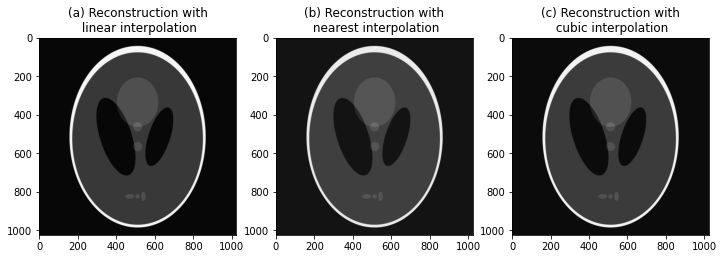

In [115]:
# Display the reconstructions with different interpolations
fig,(ax1,ax2,ax3 )= plt.subplots(1,3,figsize = (12,4.5))

ax1.set_title('(a) Reconstruction with\n linear interpolation') 
ax1.imshow(reconstructions_i[0],cmap='gray')
ax2.set_title('(b) Reconstruction with\n nearest interpolation') 

ax2.imshow(reconstructions_i[1],cmap='gray')
ax3.set_title('(c) Reconstruction with\n cubic interpolation') 
ax3.imshow(reconstructions_i[2],cmap='gray')
plt.show()

In [93]:
for i in range(len(errors_i)):
  print('Using ' + interpolations[i] + ' interpolation, the 'f"FBP rms reconstruction error: {np.sqrt(np.mean(errors_i[i]**2)):.3g}")

Using linear interpolation, the FBP rms reconstruction error: 2.99
Using nearest interpolation, the FBP rms reconstruction error: 3.05
Using cubic interpolation, the FBP rms reconstruction error: 2.3



3. Re-use the noisy sinogram data from 2.1. Experiment with filter and frequency scaling to get
the best reconstruction.

In [53]:
recon_ns = []
error_ns = []
for i in range(len(filters)):
  for j in range(len(interpolations)):
    recon_ns.append(iradon(sin_noise, theta=theta, filter = filters[i], interpolation= interpolations[j]))
    error_ns.append(iradon(sin_noise, theta=theta, filter = filters[i], interpolation= interpolations[j])- im[:,:,0])




In [74]:

for i in range(len(error_ns)):
  print(f"FBP rms reconstruction error: {np.sqrt(np.mean(error_ns[i]**2)):.5g}") # hann and linear

FBP rms reconstruction error: 1.0347e+05
FBP rms reconstruction error: 1.0347e+05
FBP rms reconstruction error: 1.0347e+05
FBP rms reconstruction error: 62.587
FBP rms reconstruction error: 62.914
FBP rms reconstruction error: 62.896
FBP rms reconstruction error: 62.447
FBP rms reconstruction error: 62.691
FBP rms reconstruction error: 62.704
FBP rms reconstruction error: 62.241
FBP rms reconstruction error: 62.393
FBP rms reconstruction error: 62.432
FBP rms reconstruction error: 62.038
FBP rms reconstruction error: 62.157
FBP rms reconstruction error: 62.194
FBP rms reconstruction error: 62.009
FBP rms reconstruction error: 62.123
FBP rms reconstruction error: 62.159


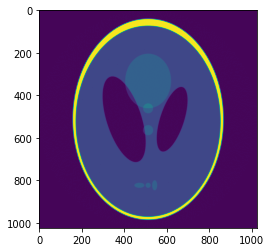

In [67]:
re_n = iradon(sin_noise, theta=theta, filter='hann')
plt.imshow(re_n,cmap='gray')

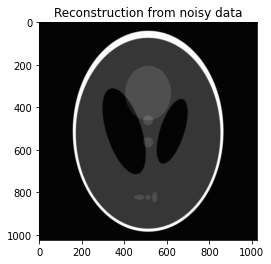

In [68]:
plt.title('Reconstruction from noisy data')
plt.imshow(re_n,cmap='gray')
plt.show()

2.3 Linearity of FBP

The FBP is a linear reconstruction algorithm meaning that the complete reconstruction can be
obtained as the sum of reconstruction from parts of the data. This can be used in practice to
compute the contribution to the reconstruction from each projection as soon as it is acquired,
i.e., before the scan is complete.

1. Partition the full data set into four partial data sets, e.g., 0-45 degrees, 45-90 degrees, etc. You may also partition in other ways for example by interleaving the four sets. Make the FBP reconstruction from each partial data set, display and comment.




In [61]:
# Define ranges of angles
angles = []
for i in range(4):
  #angles.append(np.arange(45*i,45*(i+1)))
  angles.append(np.linspace(45.*i, 45.*(i+1), max(im.shape), endpoint=False))

# Make the partial sinograms
sinogram_ps = []

for i in range(len(angles)):
  sinogram_ps.append(radon(im[:,:,0], theta=angles[i], circle=True))

# Make the partial reconstructions

reconstructions = []
for i in range(len(angles)):
  reconstructions.append(iradon(sinogram_ps[i],theta=angles[i]))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Image dtype is not float. By default radon will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.18 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
  # This is added back by InteractiveShellApp.init_path()


In [85]:

for i in range(len(reconstructions)):
  print(reconstructions[i].shape)


(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)


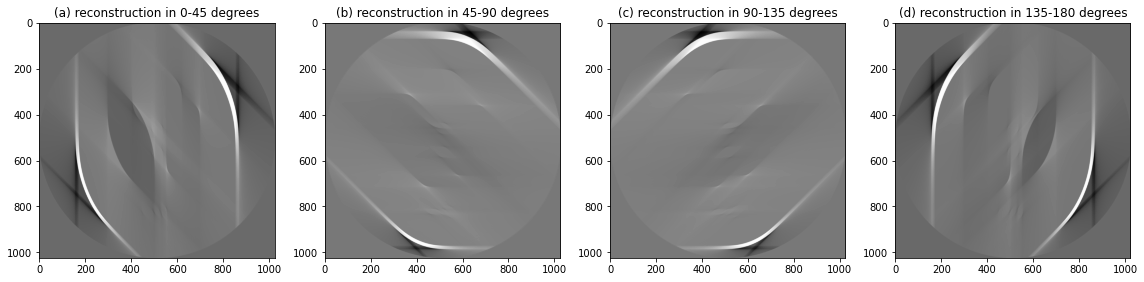

In [94]:

fig,axes = plt.subplots(1,4,figsize=(16,4.5))
titles = ['(a) reconstruction in 0-45 degrees','(b) reconstruction in 45-90 degrees','(c) reconstruction in 90-135 degrees','(d) reconstruction in 135-180 degrees']
for i in range(4):
  axes[i].set_title(titles[i])
  axes[i].imshow(reconstructions[i], cmap=plt.cm.Greys_r)
  fig.tight_layout()
plt.show()

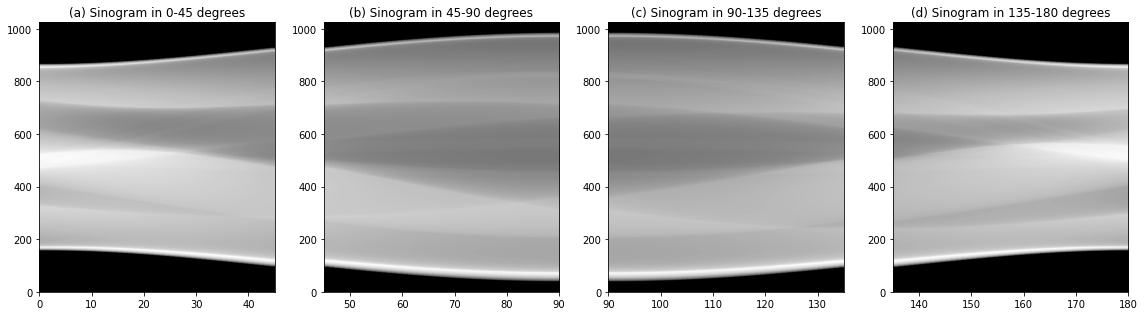

In [62]:
# Display the partial sinograms
fig,axes = plt.subplots(1,4,figsize=(16,4.5))
titles = ['(a) Sinogram in 0-45 degrees','(b) Sinogram in 45-90 degrees','(c) Sinogram in 90-135 degrees','(d) Sinogram in 135-180 degrees']
for i in range(4):
  axes[i].set_title(titles[i])
  axes[i].imshow(sinogram_ps[i], cmap=plt.cm.Greys_r,extent=(45*i, 45*(i+1), 0, sinogram_ps[i].shape[0]), aspect='auto')
  fig.tight_layout()
plt.show()

2. Now sum the four reconstructions and compare with the reconstruction from all data.


In [62]:
# Sum all the partial reconstructions
reconstrction = sum(reconstructions)

#reconstrction  = reconstructions[0]+reconstructions[1]+reconstructions[2] +reconstructions[3]
print(reconstrction.shape)
print(np.min(reconstrction - 4*recon_c))

(1024, 1024)
-13.620383356530112


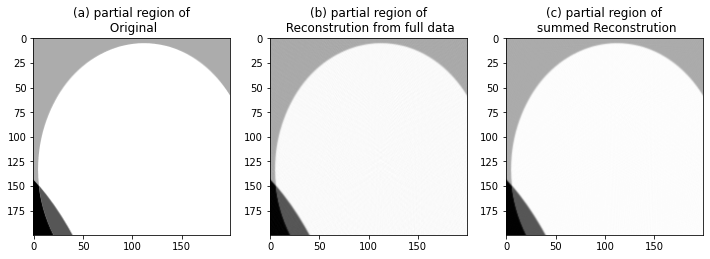

In [63]:
# Display the summed reconstruction
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (12,4.5))
ax1.set_title('(a) partial region of\n Original')
ax1.imshow(im[200:400,400:600,0],cmap = 'gray')
#fig.colorbar(ax1.imshow(im[200:400,400:600],cmap = 'gray'),ax=ax1)
ax2.set_title('(b) partial region of\n Reconstrution from full data')
a = ax2.imshow(recon_c[200:400,400:600],cmap = 'gray')
#fig.colorbar(a,ax = ax2)
ax3.set_title('(c) partial region of\n summed Reconstrution')
b = ax3.imshow(reconstrction[200:400,400:600],cmap='gray')
#fig.colorbar(b,ax = ax3)
plt.savefig('partial linear reconstruction.png')
plt.show()

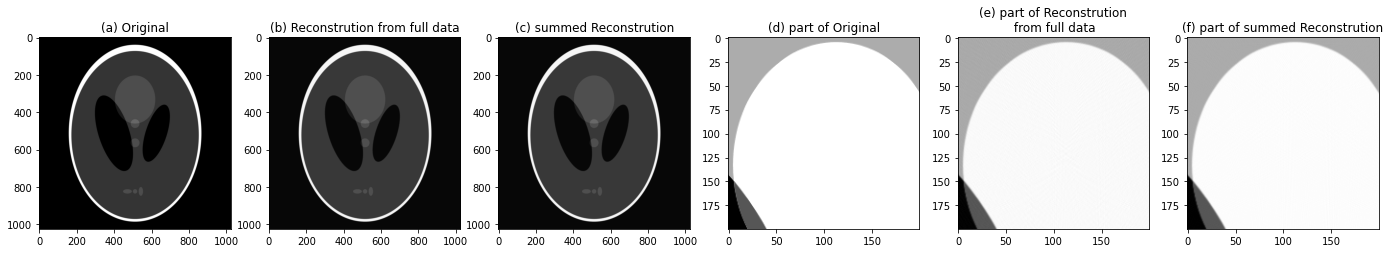

In [66]:
# Display the summed reconstruction
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6,figsize = (24,4.5))
ax1.set_title('(a) Original')
ax1.imshow(im,cmap = 'gray')
#fig.colorbar(ax1.imshow(im[200:400,400:600],cmap = 'gray'),ax=ax1)
ax2.set_title('(b) Reconstrution from full data')
a = ax2.imshow(recon_c,cmap = 'gray')
#fig.colorbar(a,ax = ax2)
ax3.set_title('(c) summed Reconstrution')
b = ax3.imshow(reconstrction,cmap='gray')
#fig.colorbar(b,ax = ax3)
ax4.set_title('(d) part of Original')
ax4.imshow(im[200:400,400:600,0],cmap = 'gray')
#fig.colorbar(ax1.imshow(im[200:400,400:600],cmap = 'gray'),ax=ax1)
ax5.set_title('(e) part of Reconstrution\n from full data')
ax5.imshow(recon_c[200:400,400:600],cmap = 'gray')
#fig.colorbar(a,ax = ax2)
ax6.set_title('(f) part of summed Reconstrution')
ax6.imshow(reconstrction[200:400,400:600],cmap='gray')
plt.savefig('reconstruction.png')
plt.show()

What do you see? Is this what you expect? Explain!

# References

For further information on tomographic reconstruction, see

[1] AC Kak, M Slaney, "Principles of Computerized Tomographic Imaging",
       IEEE Press 1988. http://www.slaney.org/pct/pct-toc.html

[2] Wikipedia, Radon transform,
       https://en.wikipedia.org/wiki/Radon_transform#Relationship_with_the_Fourier_transform


